In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pytz

In [15]:
# Load the dataset
data_path = 'EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_38647/3370982819.py:3: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


In [16]:
# Overview of the dataset
data.info()
print('-' * 100)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443790e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483280e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


In [17]:
# Check for missing values
def check_missing_values(df):
    missing_cols = df.isnull().sum()
    print("Missing values per column:\n", missing_cols[missing_cols > 0])

    missing_rows = df.isnull().sum(axis=1)
    total_missing = df.isnull().sum().sum()

    print(f"\nTotal missing values: {total_missing}")
    print("Total number of rows with missing values:", len(missing_rows[missing_rows > 0]))
    print("Total number of columns with missing values:", len(missing_cols[missing_cols > 0]))
    return

check_missing_values(data)

Missing values per column:
 Transaction Date (Pacific Time)      209
Port Type                              9
EVSE ID                            78948
Currency                            1788
Ended By                             248
Driver Postal Code                  8402
User ID                             7677
County                             84665
System S/N                         78948
Model Number                       78948
dtype: int64

Total missing values: 339842
Total number of rows with missing values: 89969
Total number of columns with missing values: 10


In [18]:
# Drop columns with >8000 missing values
threshold = 8000
cols_to_drop = data.columns[data.isnull().sum() > threshold]
data = data.drop(columns=cols_to_drop)

# Replace missing 'Port Type' with the mode
if 'Port Type' in data.columns:
	data['Port Type'] = data['Port Type'].fillna(data['Port Type'].mode()[0])

# Replace missing 'Model Number' with 'Unknown'
if 'Model Number' in data.columns:
	data['Model Number'] = data['Model Number'].fillna('Unknown')

# Drop rows with missing 'User ID'
if 'User ID' in data.columns:
	data = data.dropna(subset=['User ID'])

	# Remove non-numeric 'User ID' values and convert to integer
	data = data[pd.to_numeric(data['User ID'], errors='coerce').notnull()]
	data['User ID'] = data['User ID'].astype(int)

# Drop remaining rows with missing values
data = data.dropna()

print("Remaining missing values after cleaning:")
check_missing_values(data)

Remaining missing values after cleaning:
Missing values per column:
 Series([], dtype: int64)

Total missing values: 0
Total number of rows with missing values: 0
Total number of columns with missing values: 0


In [19]:
# Convert datetime columns to datetime objects
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')  # Handle invalid values
data['Transaction Date (Pacific Time)'] = pd.to_datetime(data['Transaction Date (Pacific Time)'], errors='coerce')

# Convert time durations to timedelta
data['Total Duration (hh:mm:ss)'] = pd.to_timedelta(data['Total Duration (hh:mm:ss)'])
data['Charging Time (hh:mm:ss)'] = pd.to_timedelta(data['Charging Time (hh:mm:ss)'])

# Convert durations to minutes
data['Total Charging Time (min)'] = data['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60
data['Total Duration (min)'] = data['Total Duration (hh:mm:ss)'].dt.total_seconds() / 60

# Calculate energy usage per minute
data['kWh per min'] = data['Energy (kWh)'] / data['Total Charging Time (min)']

# Add day of the week
data['Day of week'] = data['Start Date'].dt.dayofweek

# Map time zones
tz_mapping = {
    'PDT': 'US/Pacific',
    'PST': 'US/Pacific',
    'UTC': 'UTC'
}

# Localize and convert times to UTC
def localize_to_timezone(row, datetime_col, tz_col):
    tz_name = row[tz_col]  # Get timezone string
    timezone = pytz.timezone(tz_mapping.get(tz_name))  # Map to pytz timezone string
    return row[datetime_col].tz_localize(timezone, ambiguous='NaT', nonexistent='NaT') # Localize datetime

data['Start Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'Start Date', 'Start Time Zone'), axis=1)
data['End Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'End Date', 'End Time Zone'), axis=1)
data['Start Date UTC'] = pd.to_datetime(data['Start Date Localized'], utc=True)
data['End Date UTC'] = pd.to_datetime(data['End Date Localized'], utc=True)

In [20]:
# Split events into multiple rows for each hour
def count_minutes(start_date, current_hour, total_time, minutes_):
    if (start_date.replace(minute=0, second=0) == current_hour):
        if ((60 - start_date.minute) > total_time):
            _min_in_hour = total_time
        else:
            _min_in_hour = 60 - start_date.minute
    elif ((minutes_ + 60) <= total_time):
        _min_in_hour = 60
    elif ((minutes_ + 60) > total_time):
        _min_in_hour = total_time - minutes_
    else:
        print("You missed something :P")
    return _min_in_hour

def split_event_into_hours(row):
    start_date = row['Start Date UTC']
    end_date = row['End Date UTC']
    total_charging_time = row['Total Charging Time (min)']
    total_duration = row['Total Duration (min)']
    kWh_per_min = row['kWh per min']
    
    hourly_rows = []
    minutes_charged = 0
    minutes_occupied = 0
    current_hour = start_date.replace(minute=0, second=0)
    
    while current_hour < end_date:
        charging_min_in_hour = count_minutes(start_date, current_hour, total_charging_time, minutes_charged)
        occupied_min_in_hour = count_minutes(start_date, current_hour, total_duration, minutes_occupied)
        
        hourly_energy = charging_min_in_hour * kWh_per_min
        hourly_occupation = occupied_min_in_hour / 60  # Convert to hours
        
        hourly_rows.append({
            'Date UTC': current_hour,
            'Charging Time (min)': charging_min_in_hour,
            'Duration (min)': occupied_min_in_hour,
            'Hourly Energy Consumption (kWh)': hourly_energy,
            'Hourly Charger Occupation (h)': hourly_occupation
        })

        minutes_charged += charging_min_in_hour
        minutes_occupied += occupied_min_in_hour
        current_hour += pd.Timedelta(hours=1)

    return pd.DataFrame(hourly_rows)

hourly_data = pd.concat(data.apply(split_event_into_hours, axis=1).tolist(), ignore_index=True)

In [21]:
# One-hot encode categorical variables if they exist
categorical_columns = ['Model Number', 'Port Type']
existing_categorical_columns = [col for col in categorical_columns if col in data.columns]
encoded_data = pd.get_dummies(data, columns=existing_categorical_columns)

# Ensure only numeric columns are passed to the scaler, excluding timedelta columns
numeric_columns = encoded_data.select_dtypes(include=[np.number]).columns
timedelta_columns = encoded_data.select_dtypes(include=[np.timedelta64]).columns
numeric_columns = numeric_columns.difference(timedelta_columns)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_data[numeric_columns])

scaled_data = pd.DataFrame(scaled_features, columns=numeric_columns)

# Display scaled data
print("Scaled Data for Clustering:")
scaled_data.head()

Scaled Data for Clustering:


,Day of week,Energy (kWh),Fee,GHG Savings (kg),Gasoline Savings (gallons),Latitude,Longitude,Plug In Event Id,Port Number,Postal Code,Total Charging Time (min),Total Duration (min),User ID,kWh per min
0,0.592782,-0.321099,-0.576508,-0.321023,-0.321441,0.525317,-0.593691,-0.29227,0.836416,-0.68303,-0.069689,0.263348,-0.388685,-0.566990
1,1.112076,-1.184034,-0.576508,-1.183956,-1.184454,0.525317,-0.593691,-0.29227,0.836416,-0.68303,-1.435104,-1.112155,-0.388440,-0.521396
2,1.112076,0.901382,-0.576508,0.901467,0.900881,0.525317,-0.593691,-0.29227,0.836416,-0.68303,1.676395,0.824365,-0.388440,-0.452342
3,1.112076,-0.193238,-0.576508,-0.193255,-0.192717,0.525317,-0.593691,-0.29227,0.836416,-0.68303,0.038871,-0.192542,-0.388889,-0.447038
4,1.112076,-0.923985,-0.576508,-0.924073,-0.923648,0.525317,-0.593691,-0.29227,0.836416,-0.68303,-0.923758,-0.586770,-0.388552,-0.923846


# Stations

## Grouping user data by charging time and energy consumption

In [22]:
# Set 'Start Date' as the index
d = data.set_index('Start Date')

# Extract 'date' and 'hour' from the index
d['date'] = d.index.date
d['hour'] = d.index.hour

# Group by 'Station Name', 'date', and 'hour', then sum 'Energy (kWh)'
hourly_energy = d.groupby(['Station Name', 'date', 'hour'])['Energy (kWh)'].sum().reset_index()

# Pivot the table: Rows -> Station Name, Columns -> Hour, Values -> Energy (kWh)
user_hourly = hourly_energy.pivot_table(
    index='Station Name', 
    columns='hour', 
    values='Energy (kWh)', 
    aggfunc='sum'  # Explicitly ensure sum is used
).fillna(0)  # Fill NaN values with 0

# Display the result
user_hourly

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Station Name,,,,,,,,,,,,,,,,,,,,,
PALO ALTO CA / BRYANT # 1,4.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.064000,...,0.000000,0.000000,5.430000,0.000000,12.113000,0.000000,0.000000,0.000000,0.000000,0.000000
PALO ALTO CA / BRYANT #1,510.997237,366.720474,120.973559,115.639411,368.079044,864.929312,5486.944825,4968.953273,7273.582109,6264.350540,...,6551.660010,5330.848278,4202.892068,4989.319178,6497.845632,4717.122701,3234.622985,2679.737086,1914.947387,994.779748
PALO ALTO CA / BRYANT #2,504.227117,337.023543,112.301141,34.328653,279.156048,777.342062,5722.946792,5588.539114,6746.121019,6848.665371,...,6537.853360,5479.403995,4891.139242,5619.349785,6754.964698,5591.042248,3696.409541,2947.181824,2486.087149,1778.190103
PALO ALTO CA / BRYANT #3,172.361432,29.895371,9.709064,0.000000,29.877331,26.838210,353.163994,2646.553208,2140.688145,2657.684063,...,2601.947625,2028.860472,1737.474471,2174.105019,2613.283507,1909.340653,1156.496091,1102.136297,582.313165,202.816003
PALO ALTO CA / BRYANT #4,18.592000,19.965000,33.159000,0.000000,0.000000,115.408000,755.312000,575.775000,2307.861000,4290.865000,...,2197.618000,1560.218000,1111.018000,1765.800000,2201.140000,1527.986000,546.867000,150.478000,60.825000,6.071000
PALO ALTO CA / BRYANT #5,56.156000,0.000000,50.039000,0.000000,0.000000,6.980000,221.121000,985.050000,2807.933000,5288.790000,...,3643.689000,2392.204000,2229.058000,3161.672000,3353.581000,2877.728000,919.341000,947.151000,328.652000,189.532000
PALO ALTO CA / BRYANT #6,135.229000,15.949000,0.000000,23.027000,30.089000,121.367000,693.091000,3264.957000,4666.089000,3762.447000,...,3741.643000,2639.702000,2707.096000,3027.529000,3611.745000,2390.753000,1347.426000,847.162000,828.838000,175.334000
PALO ALTO CA / CAMBRIDGE #1,110.896102,66.493078,36.374532,93.379257,80.252998,2631.424208,3283.170600,6299.483222,6114.115654,6024.709355,...,4969.906079,3519.770723,3225.275342,3916.745014,3839.026662,3259.278630,1748.002659,1199.375867,589.891126,309.027612
PALO ALTO CA / CAMBRIDGE #2,67.278124,2.131471,32.771000,31.219477,38.022146,2532.736258,3205.000575,5244.424409,4598.280009,4834.118182,...,4357.534556,3474.711305,2393.467373,3054.558007,2984.063379,2556.816590,1342.127820,819.440134,657.948578,120.262642


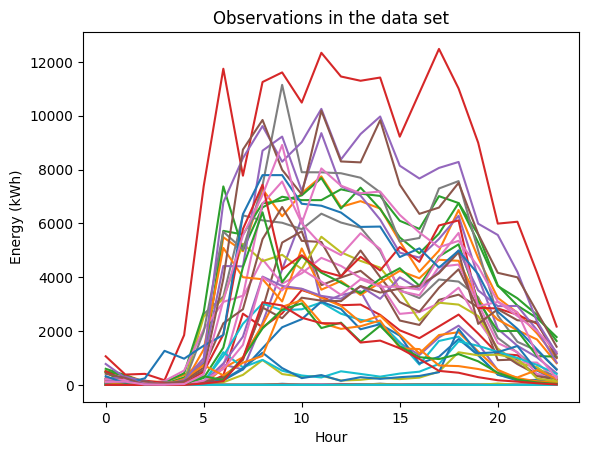

In [23]:
plt.plot(user_hourly.T)
plt.title('Observations in the data set')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.show()

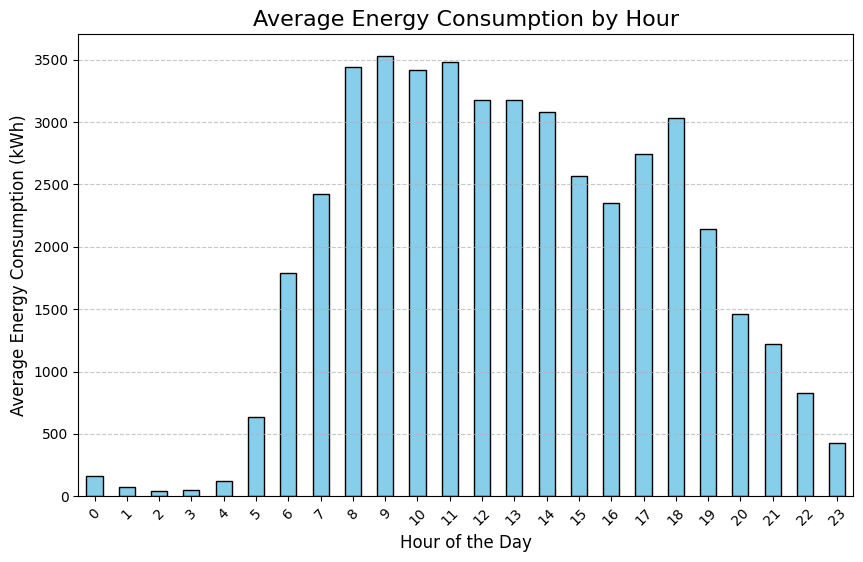

In [24]:
# Calculate the average energy consumption per hour across all users
hourly_avg_energy = user_hourly.mean(axis=0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
hourly_avg_energy.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Energy Consumption by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Energy Consumption (kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


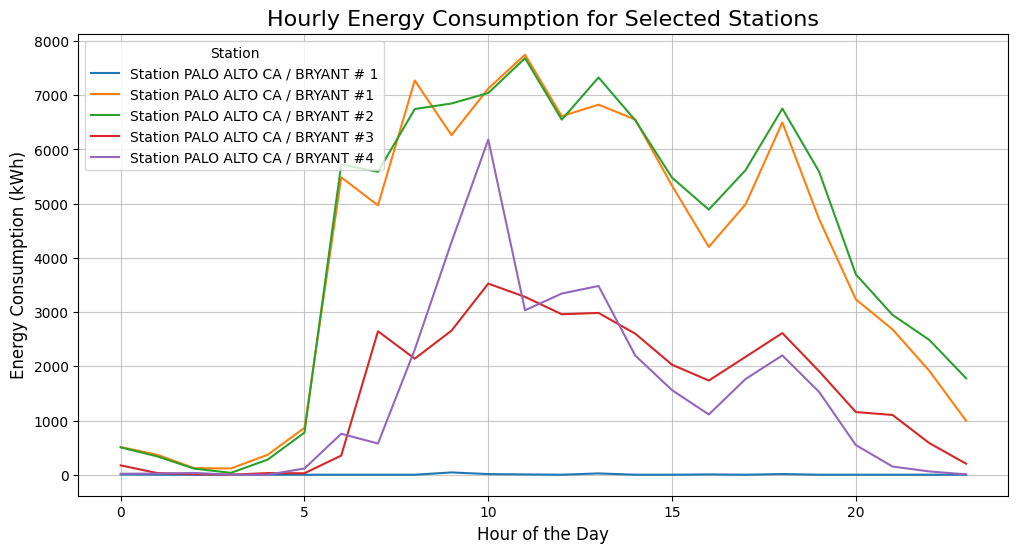

In [25]:
# Select a subset of users (e.g., first 5 users)
subset_station = user_hourly.head(5)

# Plot energy consumption for selected users
plt.figure(figsize=(12, 6))
for station_name in subset_station.index:
    plt.plot(subset_station.columns, subset_station.loc[station_name], label=f"Station {station_name}")

plt.title("Hourly Energy Consumption for Selected Stations", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.legend(title="Station")
plt.grid(alpha=0.7)
plt.show()


# Model number and port type
---

## Data preparation for Model number and port type

In [26]:
# Keep only necessary columns
focused_data = data[['User ID', 'Model Number', 'Port Type']]

# Sort the data by 'User ID'
focused_data = focused_data.sort_values(by='User ID')
focused_data

KeyError: "['Model Number'] not in index"